<h1>Procesamiento de Lenguaje Natural</h1>
<h1>Taller 5: TF-IDF</h1>


In [49]:
import re
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
from IPython.display import Image

# <h> Punto 1: Pre-Procesamiento</h2>

<h>[9 pts] Leer el archivo bob_esponja.csv usando pandas</h2>

<h>[9 pts] Crear una nueva columna con el texto en minúscula, sin caracteres especiales ni números, sin palabras vacias y hacer stemming de las palabras</h2>

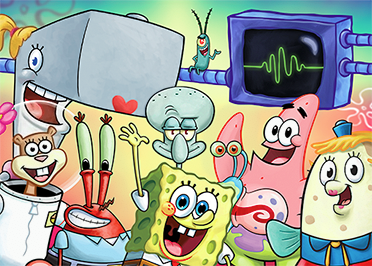

In [51]:
Image(filename="C:/Users/usuario/Desktop/NLP/22_Febrero/imagen.png")

In [39]:
Archivo = pd.read_csv("C:/Users/usuario/Desktop/NLP/22_Febrero/bob_esponja.csv")

In [40]:
Archivo

,Personaje,Descripción
0,Bob Esponja Pantalones Cuadrados,Bob Esponja es una esponja de mar con forma re...
1,Patricio Estrella,"Es una estrella de mar de color rosa, el mejor..."
2,Calamardo Tentáculos,Calamardo Tentáculos es un personaje principal...
3,Arenita Mejillas,Arenita Mejillas (Sandy Cheeks en inglés) en u...
4,Eugenio H. Cangrejo,Don Eugenio H. Cangrejo (normalmente llamado S...
5,Sheldon J. Plankton,"Sheldon J. Plankton, o simplemente Plankton, e..."
6,Karen Plankton,Karen Plankton es uno de los dos principales a...
7,Perlita Cangrejo,"Perla ""Perlita"" Cangrejo es un personaje princ..."
8,Sra. Puff,La Señora Puff es un personaje principal de Bo...
9,Gary el Caracol,Gary el Caracol es un personaje principal de B...


In [41]:
Archivo['pre-procesado']=''
i=0
for texto in Archivo.Descripción:
    texto=texto.lower()
    texto=re.sub(r"[\W\d_]+", " ", texto)
    texto = [spanishStemmer.stem(palabra) for palabra in texto.split() if palabra not in stopwords_sp]
    texto= ' '.join(texto)
    Archivo['pre-procesado'][i]=texto
    i=i+1
    
Archivo

,Personaje,Descripción,pre-procesado
0,Bob Esponja Pantalones Cuadrados,Bob Esponja es una esponja de mar con forma re...,bob esponj esponj mar form rectangul color ama...
1,Patricio Estrella,"Es una estrella de mar de color rosa, el mejor...",estrell mar color ros mejor amig bob esponj ju...
2,Calamardo Tentáculos,Calamardo Tentáculos es un personaje principal...,calamard tentacul personaj principal bob espon...
3,Arenita Mejillas,Arenita Mejillas (Sandy Cheeks en inglés) en u...,arenit mejill sandy cheeks ingles personaj pri...
4,Eugenio H. Cangrejo,Don Eugenio H. Cangrejo (normalmente llamado S...,don eugeni h cangrej normal llam señor cangrej...
5,Sheldon J. Plankton,"Sheldon J. Plankton, o simplemente Plankton, e...",sheldon j plankton simplement plankton dos ant...
6,Karen Plankton,Karen Plankton es uno de los dos principales a...,kar plankton dos principal antagon bob esponj ...
7,Perlita Cangrejo,"Perla ""Perlita"" Cangrejo es un personaje princ...",perl perlit cangrej personaj principal bob esp...
8,Sra. Puff,La Señora Puff es un personaje principal de Bo...,señor puff personaj principal bob esponj maest...
9,Gary el Caracol,Gary el Caracol es un personaje principal de B...,gary caracol personaj principal bob esponj que...


# Punto 2: TF-IDF
<h>[16 pts] Crear la matriz TF-IDF<h/1>

In [23]:

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(data['pre-procesado'].values)

tfidf_matrix = pd.DataFrame(data=tfidf.toarray(), columns=tfidf_vect.get_feature_names())

tfidf_matrix = tfidf_matrix.T.round(3)
tfidf_matrix.columns = Archivo.Personaje

tfidf_matrix

Personaje,Bob Esponja Pantalones Cuadrados,Patricio Estrella,Calamardo Tentáculos,Arenita Mejillas,Eugenio H. Cangrejo,Sheldon J. Plankton,Karen Plankton,Perlita Cangrejo,Sra. Puff,Gary el Caracol
abajo,0.059,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000
aborrece,0.000,0.0,0.091,0.000,0.000,0.0,0.000,0.0,0.000,0.000
acaba,0.000,0.0,0.091,0.000,0.000,0.0,0.000,0.0,0.000,0.000
accidente,0.050,0.0,0.000,0.000,0.046,0.0,0.000,0.0,0.000,0.000
aceptó,0.000,0.0,0.000,0.000,0.000,0.0,0.064,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...
zapatos,0.044,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.092,0.069
árbol,0.000,0.0,0.000,0.081,0.000,0.0,0.000,0.0,0.000,0.000
éste,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.093
única,0.059,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000


# Punto 3: Distancia del coseno
<h>[12 pts] Calcular la distancia del coseno entre cada una de los personajes<h/1>

In [42]:

dista_cos = cosine_distances(tfidf_matrix.T.values)
dista_cos = pd.DataFrame(dist_cos, columns = tfidf_matrix.columns, index = tfidf_matrix.columns)
dista_cos

Personaje,Bob Esponja Pantalones Cuadrados,Patricio Estrella,Calamardo Tentáculos,Arenita Mejillas,Eugenio H. Cangrejo,Sheldon J. Plankton,Karen Plankton,Perlita Cangrejo,Sra. Puff,Gary el Caracol
Personaje,,,,,,,,,,
Bob Esponja Pantalones Cuadrados,0.000000,0.850696,0.927102,0.872229,0.881327,0.901863,0.957853,0.915862,0.882557,0.931151
Patricio Estrella,0.850696,0.000000,0.809173,0.893461,0.893984,0.968212,0.961591,0.936322,0.954731,0.922892
Calamardo Tentáculos,0.927102,0.809173,0.000000,0.944294,0.873432,0.921283,0.969339,0.972793,0.968218,0.914859
Arenita Mejillas,0.872229,0.893461,0.944294,0.000000,0.927194,0.982124,0.961457,0.982504,0.983133,0.930661
Eugenio H. Cangrejo,0.881327,0.893984,0.873432,0.927194,0.000000,0.705246,0.903650,0.829501,0.938176,0.928466
Sheldon J. Plankton,0.901863,0.968212,0.921283,0.982124,0.705246,0.000000,0.808338,0.921415,0.990023,0.971529
Karen Plankton,0.957853,0.961591,0.969339,0.961457,0.903650,0.808338,0.000000,0.984117,0.991405,0.978311
Perlita Cangrejo,0.915862,0.936322,0.972793,0.982504,0.829501,0.921415,0.984117,0.000000,0.895047,0.967758
Sra. Puff,0.882557,0.954731,0.968218,0.983133,0.938176,0.990023,0.991405,0.895047,0.000000,0.963548


# ¿Cuáles son los personajes más parecidos?

In [44]:
min=1
for i_menor, menor in dista_cos.iterrows():
    for valor in menor:
        if valor >0 and valor <min : min = valor
        

In [45]:
np.where(dista_cos == min)

(array([4, 5], dtype=int64), array([5, 4], dtype=int64))

In [46]:
round(min,6)

0.705246

In [54]:
print (f"Los personajes más parecidos son Sheldon J. Plankton y Eugenio H. Cangrejo {round(min,6)}")

Los personajes más parecidos son Sheldon J. Plankton y Eugenio H. Cangrejo 0.705246


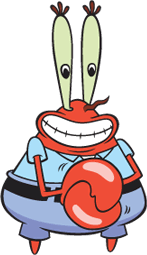

In [65]:

Image(filename="C:/Users/usuario/Desktop/NLP/22_Febrero/cangrejo_don.png")

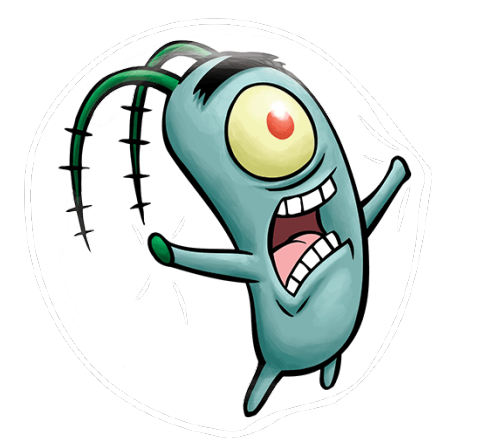

In [67]:

Image(filename="C:/Users/usuario/Desktop/NLP/22_Febrero/Plankton.png")

# ¿Cuáles son los personajes más diferente?

In [52]:
dista_cos.values.max().round(6)

0.991405

In [53]:

print (f"Las personajes mas diferentes son Sra.Puff y Karen Plankton con una distancia de {dista_cos.values.max().round(6)}")

Las personajes mas diferentes son Sra.Puff y Karen Plankton con una distancia de 0.991405


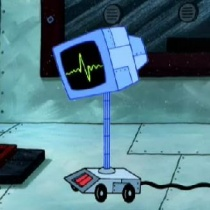

In [71]:
Image(filename="C:/Users/usuario/Desktop/NLP/22_Febrero/Karen.jpg")

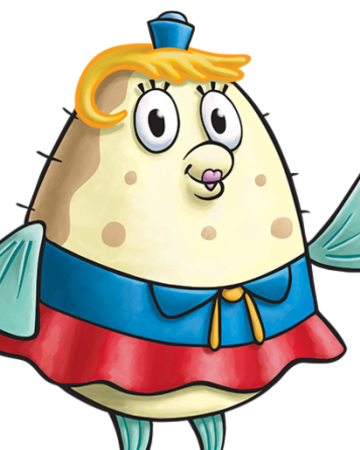

In [69]:
Image(filename="C:/Users/usuario/Desktop/NLP/22_Febrero/Puff.png")

In [47]:
np.min(dista_cos)

Personaje
Bob Esponja Pantalones Cuadrados    0.0
Patricio Estrella                   0.0
Calamardo Tentáculos                0.0
Arenita Mejillas                    0.0
Eugenio H. Cangrejo                 0.0
Sheldon J. Plankton                 0.0
Karen Plankton                      0.0
Perlita Cangrejo                    0.0
Sra. Puff                           0.0
Gary el Caracol                     0.0
dtype: float64

In [48]:
np.max(dista_cos)

Personaje
Bob Esponja Pantalones Cuadrados    0.957853
Patricio Estrella                   0.968212
Calamardo Tentáculos                0.972793
Arenita Mejillas                    0.983133
Eugenio H. Cangrejo                 0.938176
Sheldon J. Plankton                 0.990023
Karen Plankton                      0.991405
Perlita Cangrejo                    0.984117
Sra. Puff                           0.991405
Gary el Caracol                     0.978311
dtype: float64